In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Upload Users Data From CSV

In [167]:
#Load Users Data 
Users= pd.read_csv ('USER_TAKEHOME (1).csv')
print(Users.head())

                         ID               CREATED_DATE  \
0  5ef3b4f17053ab141787697d  2020-06-24 20:17:54.000 Z   
1  5ff220d383fcfc12622b96bc  2021-01-03 19:53:55.000 Z   
2  6477950aa55bb77a0e27ee10  2023-05-31 18:42:18.000 Z   
3  658a306e99b40f103b63ccf8  2023-12-26 01:46:22.000 Z   
4  653cf5d6a225ea102b7ecdc2  2023-10-28 11:51:50.000 Z   

                  BIRTH_DATE STATE LANGUAGE  GENDER  
0  2000-08-11 00:00:00.000 Z    CA   es-419  female  
1  2001-09-24 04:00:00.000 Z    PA       en  female  
2  1994-10-28 00:00:00.000 Z    FL   es-419  female  
3                        NaN    NC       en     NaN  
4  1972-03-19 00:00:00.000 Z    PA       en  female  


### Data Exploration

In [169]:
Users.shape

# Get overview
Users.info()

# CHeck missing values
Users.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

**Checking for the Duplicate Values**

In [159]:
Users.nunique()

ID               100000
CREATED_DATE      99942
BIRTH_DATE        54721
STATE                52
LANGUAGE              2
GENDER               11
BIRTH_YEAR          116
LANGUAGE_DESC         2
dtype: int64

There are total 100000 in the dataset.  
Column ID shows total 100000 unique value which indicates no duplicated IDs.

### Data Quality Issue
**1. Convert BIRTH_DATE and CREATED_DATE to Datetime**
- The date is a ISO-8601 format, UTC date time.

In [200]:
Users['CREATED_DATE'] = pd.to_datetime(Users['CREATED_DATE'])
Users['BIRTH_DATE'] = pd.to_datetime(Users['BIRTH_DATE'])
# Extract the year from the BIRTH_DATE
Users['BIRTH_YEAR'] = Users['BIRTH_DATE'].dt.year

Users.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,BIRTH_YEAR
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11 00:00:00+00:00,CA,es-419,female,2000.0
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24 04:00:00+00:00,PA,en,female,2001.0
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28 00:00:00+00:00,FL,es-419,female,1994.0
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,NaT,NC,en,NaN,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19 00:00:00+00:00,PA,en,female,1972.0


**2. Understand what columns Language means**

In [202]:
# Check unique language, based on Users.nunique() language has 2 values
print(Users['LANGUAGE'].value_counts())

# Add LANGUAGE_DESC column to make it understandable
Users['LANGUAGE_DESC'] = Users['LANGUAGE'].apply( lambda x: 'Latin American Spanish' if x == 'es-419' else( 'English' if x == 'en' else x))
Users.head()

LANGUAGE
en        63403
es-419     6089
Name: count, dtype: int64


,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,BIRTH_YEAR,LANGUAGE_DESC
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11 00:00:00+00:00,CA,es-419,female,2000.0,Latin American Spanish
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24 04:00:00+00:00,PA,en,female,2001.0,English
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28 00:00:00+00:00,FL,es-419,female,1994.0,Latin American Spanish
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,NaT,NC,en,NaN,NaN,English
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19 00:00:00+00:00,PA,en,female,1972.0,English


**3.Date Logic Inconsistencies**

In [205]:
invalid_dates = Users[Users['CREATED_DATE'] < Users['BIRTH_DATE']]
print(invalid_dates)

                             ID              CREATED_DATE  \
41974  5f31fc048fa1e914d38d6952 2020-08-11 02:01:41+00:00   

                     BIRTH_DATE STATE LANGUAGE GENDER  BIRTH_YEAR  \
41974 2020-10-02 15:27:28+00:00    CA      NaN    NaN      2020.0   

      LANGUAGE_DESC  
41974           NaN  


There is one User has a CREATED_DATE < BIRTH_DATE

### Data Exploration and Visualization

GENDER
female                    64240
male                      25829
transgender                1772
prefer_not_to_say          1350
non_binary                  473
unknown                     196
not_listed                  180
Non-Binary                   34
not_specified                28
My gender isn't listed        5
Prefer not to say             1
Name: count, dtype: int64


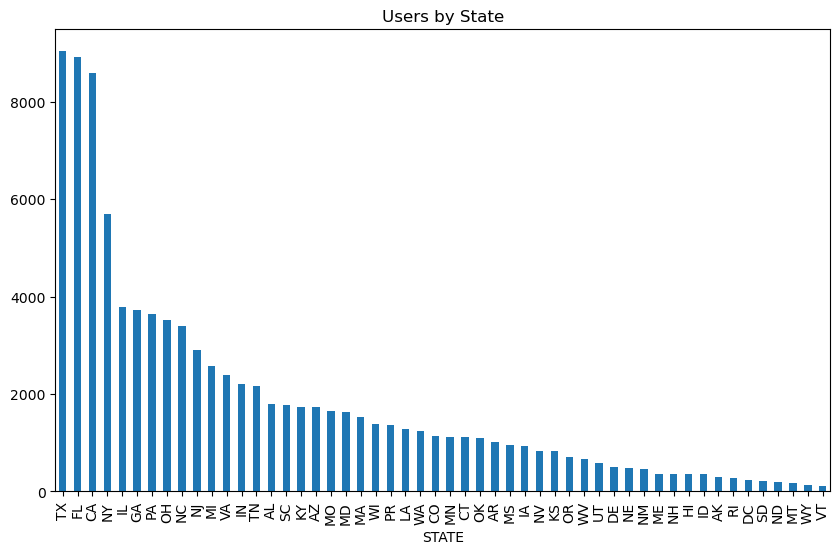

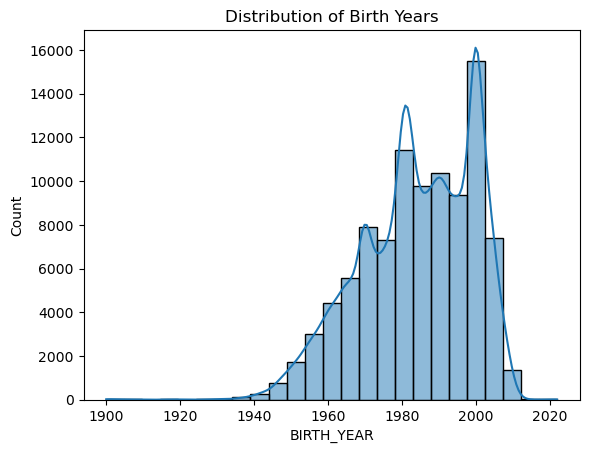

In [214]:

# Count unique genders
print(Users['GENDER'].value_counts())

# Plot user counts by state
Users['STATE'].value_counts().plot(kind='bar', figsize=(10, 6), title='Users by State')
plt.show()

# Distribution of birth years
sns.histplot(Users['BIRTH_YEAR'].dropna(), bins= 25, kde=True)
plt.title('Distribution of Birth Years')
plt.show()


- The **Users by States** shows the top 3 users are located in Texas, Florida, and California.
- The **Distribution of Birth Year** chart reveals that the highest number of users were born in the year 2000."

**Data Relationships**

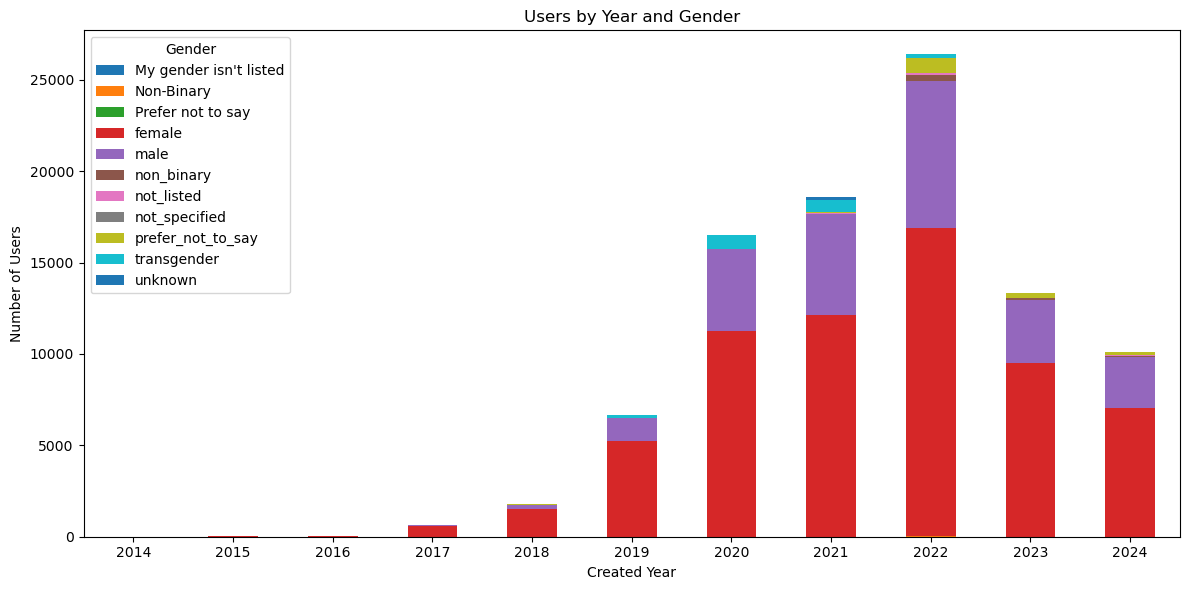

In [184]:
# Count of users per year by gender
Users['CREATED_DATE'] = pd.to_datetime(Users['CREATED_DATE'])
Users_by_year_gender = Users.groupby([Users['CREATED_DATE'].dt.year, 'GENDER']).size().unstack()
Users_by_year_gender.plot(kind = 'bar', stacked = True, figsize = (12, 6), title = 'Users by Year and Gender')

plt.xticks(rotation=0)
plt.xlabel('Created Year')
plt.ylabel('Number of Users')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Based on the bar chart, it appears that the number of female users registering on the platform is higher than other genders, indicating a greater preference or higher engagement from females in joining the platform.

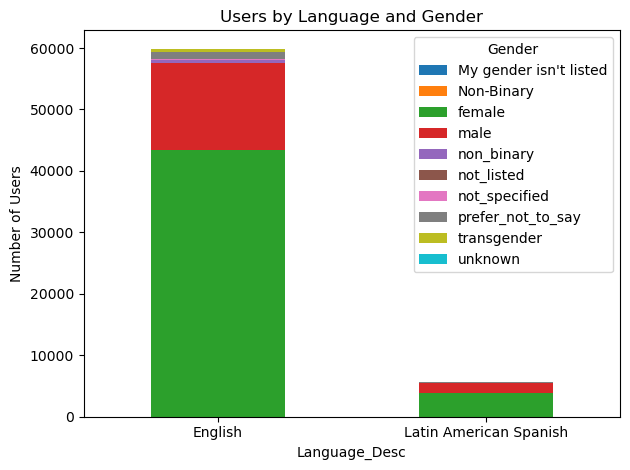

In [150]:
Users_by_Language_gender = Users.groupby(['LANGUAGE_DESC', 'GENDER']).size().unstack(fill_value=0)
Users_by_Language_gender.plot(kind = 'bar', stacked = True ,  title = 'Users by Language and Gender')

plt.xticks(rotation=0)
plt.xlabel('Language_Desc')
plt.ylabel('Number of Users')
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


The bar chart indicates that English is the most commonly spoken language among users on the platform. Additionally, both English and Latin American Spanish categories have a higher proportion of female users compared to other genders users.